In [22]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer 
from sklearn.metrics import accuracy_score



## Read the data

Loading data into dataframe from 'citation_sentiment_corpus.txt'

In [23]:
data = pd.read_csv('citation_sentiment_corpus.txt', sep="\t", header=None)
data.columns = ["Source_Paper_ID", "Target_Paper_ID", "Sentiment", "Citation_Text"]
data.tail()

,Source_Paper_ID,Target_Paper_ID,Sentiment,Citation_Text
8731,W98-1118,W96-0213,p,He has achieved state-of-the art results by ap...
8732,W99-0606,W96-0213,o,"B = (Brill and Wu, 1998); M = (Magerman, 1995)..."
8733,W99-0607,W96-0213,o,The model we use is similar to that of (Ratnap...
8734,W99-0607,W96-0213,p,Our model exploits the same kind of tag-n-gram...
8735,W99-0608,W96-0213,o,"In that table, TBL stands for Brill's transfor..."


### Removing duplicate data

In [24]:
print ("Original:", data.shape)
data = data.drop_duplicates()
data = data.reset_index(drop=True)
print ("Drop Dupicates:", data.shape)

Original: (8736, 4)
Drop Dupicates: (8734, 4)


### Adding lemmatized citation text to data frame

In [25]:
lemmatizer = WordNetLemmatizer() 
def lemmatize(cite_text):
    result = []
    for text in cite_text.values:
        
        #Lowercasing before negation
        lower_case = text.lower()
        #Lemmatization
        lemm = lemmatizer.lemmatize(lower_case)
        result.append(lemm)
        
    return result

data['lemmatized_text']= lemmatize(data['Citation_Text'])


### Train and test split on citation text

In [26]:
corpus = data['Citation_Text']
num_training = 7000
train_X = corpus[:num_training]
test_X = corpus[num_training:]
train_Y = data['Sentiment'][:num_training]
test_Y=data['Sentiment'][num_training:]

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,3) ,min_df=1, use_idf=True, smooth_idf=True)

# Vectorize the training data
X_train = vectorizer.fit_transform(train_X)
# Vectorize the test data
X_test = vectorizer.transform(test_X)
svm_C = 1000

# Train the SVM, optimized by Stochastic Gradient Descent 
clf = SVC(probability=True, verbose=False, class_weight=None, kernel="rbf")

clf.fit(X_train, train_Y) 

# Make predictions
pred = clf.predict(X_test)


In [ ]:
print (accuracy_score(Y_test, pred))


In [17]:
from sklearn import metrics

matrix = metrics.confusion_matrix(Y_test, pred)

In [18]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

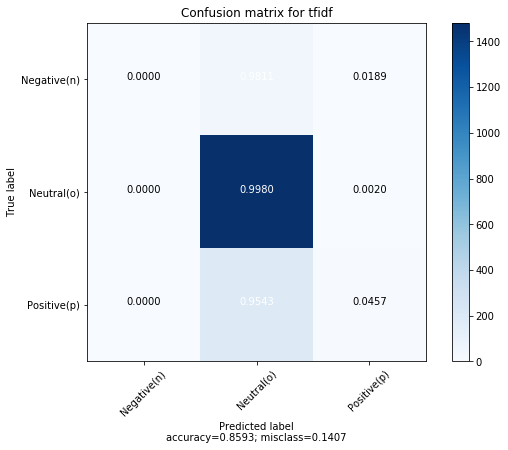

In [19]:
target_names = ["Negative(n)", "Neutral(o)", "Positive(p)"]
plot_confusion_matrix(matrix,
                          target_names,
                          title='Confusion matrix for tfidf',
                          cmap=None,
                          normalize=True)